In [1]:
%load_ext autoreload

In [2]:
%autoreload
import pandas as pd
import numpy as np
import datetime 
from datetime import datetime
import scipy as sc
from scipy.stats import norm
import math
import utilities as ut
import utilities_2 as ut2
import matplotlib.pyplot as plt


In [3]:

df=pd.read_csv('EUROSTOXX50_2023_Dataset.csv', index_col=0) #we read the csv file and convert it in a dataframe on python 

name_stocks0=['ADSGn.DE', 'ALVG.DE', 'MUVGn.DE',
                            'OREP.PA'] #we select the required stocks for the Exercise 0
dates_num=['2016-03-18','2019-03-20'] #we choose a 3y estimation starting from today (20th March 2019) 
                                           #and going backward up to the first business day before 21st March 2016
dates_den = ['2016-03-17','2019-03-19']

np_num, np_den=ut.read_our_CSV(df,name_stocks0, dates_num, dates_den) #we call our read csv function to convert the dataframe in numpy arrays
                                                                        #paying attention to the missing values

In [4]:

#Parameters
alpha=0.95
notional=1e7
delta=1
n_asset=4
weights=np.ones((n_asset,1))/n_asset #we consider a equally weighted portfolio
returns=np.log(np_num/np_den) #computation of the returns

VaR, ES = ut.AnalyticalNormalMeasures(alpha,weights,notional,delta,returns) #we compute the VaR and the ES using a Gaussian parametric approach
print("VaR_0:", VaR, "ES_0:", ES)

VaR_check=ut.plausibilityCheck(returns, weights, alpha, notional, delta) #we check the result with a Plausibility check to estimate the order of magnitude of portfolio VaR
print("VaR check_0:", VaR_check)

VaR_0: 146813.58536847658 ES_0: 185434.4799413243
VaR check_0: 139905.9213679971


In [5]:
#Exercise 1a
#Parameters
sett_date1='2019-03-20'
alpha_1=0.99
dates_num1=dates_num
dates_den1 = dates_den #3y estimation as before
shares1=np.array([25000, 20000, 20000, 10000])
Nsim=200
name_stocks1a=['TTEF.PA', 'DANO.PA', 'SASY.PA', 'VOWG_p.DE'] #we select the required stocks for the Exercise 1a)

stockPrice_1a=df.loc[[sett_date1],name_stocks1a].to_numpy() #we extract the price of the stocks at the sett_date 
                                                                #and then we convert the chosen row in a numpy array to perform calculation
ptf_value1a=shares1.dot(stockPrice_1a.T) #value of the portfolio
weights_1a=(shares1*stockPrice_1a/ptf_value1a).T #we compute the corresponding weight of each stock related with its number of shares
np_num1a, np_den1a=ut.read_our_CSV(df,name_stocks1a, dates_num1, dates_den1) 
logReturns_1a=np.log(np_num1a/np_den1a) 

In [6]:

ES_HSM, VaR_HSM= ut2.HSMeasurements(logReturns_1a, alpha_1, weights_1a, ptf_value1a, delta) #we compute the VaR and the ES via a Historical Simulation
print("VaR_HSM:", VaR_HSM,"ES_HSM:", ES_HSM)

#CHECK
VaR_check_HSM=ut.plausibilityCheck(logReturns_1a, weights_1a, alpha_1, ptf_value1a, delta) #as we did previously we check the result
print("VaR_check_HSM:", VaR_check_HSM)

samples_Bootstrap=ut2.bootstrapStatistical(Nsim, logReturns_1a) #we call the Bootstrap function to extract randomly Nsim partial sets of risk factors 
VaR_boot = ut2.HSMeasurements(samples_Bootstrap, alpha_1, weights_1a, ptf_value1a, delta) #then we pass the samples of risk factors to the HS function to compute the VaR one for each simulation
print("VaR_Bootstrap:", np.mean(VaR_boot)) #as output we print the mean of the computed VaRs

VaR_HSM: 130182.332400338 ES_HSM: 187986.8197090877
VaR_check_HSM: 136504.7100657039
VaR_Bootstrap: 141224.9559030077


In [7]:
#Exercise 1b
#Parameters
Nsim=200
name_stocks1b=['ADSGn.DE', 'AIR.PA', 'BBVA.MC', 'BMWG.DE', 'SCHN.PA'] #we select the required stocks for the Exercise 1b)
Lambda=0.97
n_asset1b=len(name_stocks1b)
weights_1b=np.ones((n_asset1b,1))/n_asset1b #we have to consider a equally weighted ptf
stockPrice_1b=df.loc[[sett_date1],name_stocks1b].to_numpy() #as before we extract the row corresponding to the value of the stocks on the sett_date
ptf_value1b=1e7 #we set the ptf value equal to the notional 10Mln

np_num1b, np_den1b=ut.read_our_CSV(df,name_stocks1b, dates_num1, dates_den1)
logReturns_1b=np.log(np_num1b/np_den1b)


In [8]:

ES_WHS, VaR_WHS=ut2.WHSMeasurements(logReturns_1b, alpha_1, Lambda, weights_1b, ptf_value1b, delta) #we compute the VaR and the ES via a Weighted Historical Simulation
print("VaR_WHS:", VaR_WHS, "ES_WHS:",ES_WHS)
#CHECK
VaR_check_WHS = ut.plausibilityCheck(logReturns_1b, weights_1b, alpha_1, ptf_value1b, delta) #check of the result
print("VaR_check_WHS:", VaR_check_WHS)



VaR_WHS: 313319.9577488967 ES_WHS: 923846.9029653204
VaR_check_WHS: 278458.34401046624


In [9]:

#Exercise 1c
#Parameters
N=20
df_1c=df.loc[:, df.columns != 'ADYEN.AS'] #we remove the column corresponding to the Adyen stock due to missing data
df_1c=df_1c.iloc[: , :N] #we select the first 20 stocks of the new dataset
name_stocks1c=df_1c.columns
np_num1c, np_den1c=ut.read_our_CSV(df,name_stocks1c, dates_num1, dates_den1)
logReturns_1c=np.log(np_num1c/np_den1c)

n_asset1c=len(name_stocks1c)
weights_1c=np.ones((n_asset1c,1))/n_asset1c #we have to consider as above a equally weighted ptf
ptf_value1c=1e8
days_VaR1c=10 #now the VaR must be computed at 10 days
n=range(1,7) #parameter used for the PCA 


In [10]:

#Initialization
ES_PCA=np.zeros((len(n),1))
VaR_PCA=np.zeros((len(n),1))
yearlyCovariance= np.cov(logReturns_1c.T) #we compute the Variance Covariance Matrix of the returns


In [11]:
yearlyMeanReturns= np.mean(logReturns_1c, axis=0).reshape((20,1)) #we compute the mean of each column (i.e. columns <-> returns of the stocks) of the matrix of the returns,
                                                                    #then we reshape it to have a column vector

In [12]:
for i in n:
    ES_PCA[i-1], VaR_PCA[i-1]= ut2.PrincCompAnalysis(yearlyCovariance, yearlyMeanReturns, weights_1c, days_VaR1c, alpha_1, i, 
                      ptf_value1c) #for each i in the set of n we compute the PCA increasing at each iteration the number of principal components to be considered
print("VaR_PCA:", VaR_PCA, "ES_PCA:", ES_PCA)


VaR_PCA: [[6671167.80515961]
 [6708951.13974804]
 [6690707.42438931]
 [6708691.4547284 ]
 [6707547.13509268]
 [6708454.55065558]] ES_PCA: [[7613918.01834314]
 [7654877.16520217]
 [7637266.20084403]
 [7656086.27419184]
 [7655111.80640014]
 [7656055.14225853]]


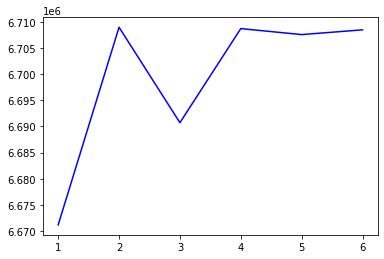

In [15]:
plt.plot(n,VaR_PCA,'b-')

In [ ]:
#CHECK
VaR_check_PCA = ut.plausibilityCheck(logReturns_1c, weights_1c, alpha_1, ptf_value1c, days_VaR1c) #check of the result
print("VaR_check_PCA:", VaR_check_PCA)

In [ ]:

#Exercise 2
#Parameters
sett_date2='2023-01-31'
expiry2='2023-04-05' #expiry of the puts
strike=25
value_ptf2=25870000
volatility=0.154
dividend=0.031
alpha_2=0.99
days_VaR=10
rate=0

In [ ]:

#We select only the stocks of Vonovia between the settlement date and 2y before
name_stocks2=['VNAn.DE']
n_asset2=len(name_stocks2)
weights_2=np.ones((n_asset2,1))/n_asset2 #equally weighted ptf
dates_num2=['2021-02-01',sett_date2]
dates_den2 = ['2021-01-29','2023-01-30'] #2y estimation using the Historical Simulation for the underlying
np_num2, np_den2=ut.read_our_CSV(df,name_stocks2, dates_num2, dates_den2)

stockPrice_2=np_num2[len(np_num2)-1] #as before we select the stock price at the sett_date
numberOfShares=value_ptf2/stockPrice_2 #number of the shares as the product between the weight of the stock (in this case equal to 1, since ptf composed by only one stock) 
                                            #and the value of the total ptf divided by the stock price at the sett_date
numberOfPuts=numberOfShares


In [ ]:
#We convert the string format of the dates to get the difference in days between the sett_date and the expiry
start = datetime.strptime(sett_date2, "%Y-%m-%d")
end = datetime.strptime(expiry2, "%Y-%m-%d")
diff = end - start
timeToMaturityInYears=diff.days/365 #ttm in days
riskMeasureTimeIntervalInYears=days_VaR/365
NumberOfDaysPerYears=np.busday_count('2022-01-01', '2023-01-01') #we compute the number of business days in a year
logReturns_2=np.log(np_num2/np_den2)


In [ ]:

VaR_MC=ut2.FullMonteCarloVaR(logReturns_2, numberOfShares, numberOfPuts, stockPrice_2, strike, rate, dividend,
                              volatility, timeToMaturityInYears, riskMeasureTimeIntervalInYears, alpha_2, NumberOfDaysPerYears) #we compute the VaR at 10 days via a Full MonteaCarlo approach            
VaR_DN=ut2.DeltaNormalVaR(logReturns_2, numberOfShares, numberOfPuts, stockPrice_2, strike, rate, dividend,                            
                            volatility, timeToMaturityInYears, riskMeasureTimeIntervalInYears, alpha_2, NumberOfDaysPerYears) #we compute the VaR at 10 days via a Delta Normal approach
print("VaR_MC:", VaR_MC, "VaR_DN:", VaR_DN)